## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import pandas as pd

def get_data(data_path: str):
    return pd.read_csv(data_path)

data = get_data("motorbike_ambulance_calls.csv")

print("Basic Statistics:")
print(data.describe())

print("Minimum Values:")
print(data.min())

print("Maximum Values:")
print(data.max())

print("Dataset Shape:", data.shape)


Basic Statistics:
            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357    

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [ ]:
import pandas as pd
data = pd.read_csv('motorbike_ambulance_calls.csv')

print(data.dtypes)
print(data.count())


index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object
index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [8]:
import pandas as pd

df = pd.read_csv("motorbike_ambulance_calls.csv") 
print("Number of missing values:") 
print(df.isnull().sum())  

Number of missing values:
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**



1. The dataset contains 17,379 records and 15 variables, with basic statistics indicating that some variables may require normalization.
2. All variables have appropriate types, but season is a categorical variable that needs to be encoded before modeling.
3. No missing values are present, so no imputation or removal is needed



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [28]:
import pandas as pd
data = pd.read_csv("motorbike_ambulance_calls.csv")  

def transform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name], dayfirst=True, errors='coerce')
    return df

data = transform_date(data, 'date')

print(data.dtypes)  

print(data['date'].min(), data['date'].max())


index                  int64
date          datetime64[ns]
season                object
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
dtype: object
2011-01-01 00:00:00 2012-12-31 00:00:00


C:\Users\asus\AppData\Local\Temp\ipykernel_19520\1460142787.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col_name] = pd.to_datetime(df[date_col_name], dayfirst=True, errors='coerce')


In [ ]:
import pandas as pd

def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()
    
    print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")

get_time_limits(data, 'date')


First day of dataset - 2011-01-01 00:00:00.
Last day of dataset - 2012-12-31 00:00:00


In [ ]:
#Часовий діапазон від 1 січня 2011 до 31 грудня 2012

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [20]:
data_caterogical = data.select_dtypes(include=['object', 'category'])
print(data.nunique())  

index         17379
date            731
season            3
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
cnt             869
dtype: int64


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [ ]:
import pandas as pd

def encode_season(df: pd.DataFrame, season_col_name: str):
    season_mapping = {
        'winter': 1,
        'spring': 2,
        'summer': 3,
        'fall': 4
    }
    df[season_col_name] = df[season_col_name].map(season_mapping)
    return df

data = encode_season(data, 'season')

print(data[['season']].head())


   season
0     2.0
1     2.0
2     2.0
3     2.0
4     2.0


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

Variable types in a dataset:
index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object


C:\Users\asus\AppData\Local\Temp\ipykernel_19520\546907775.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(subplot.get_xticklabels(), rotation=45)
C:\Users\asus\AppData\Local\Temp\ipykernel_19520\546907775.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(subplot.get_xticklabels(), rotation=45)
C:\Users\asus\AppData\Local\Temp\ipykernel_19520\546907775.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(subplot.get_xticklabels(), rotation=45)
C:\Users\asus\AppData\Local\Temp\ipykernel_19520\546907775.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(

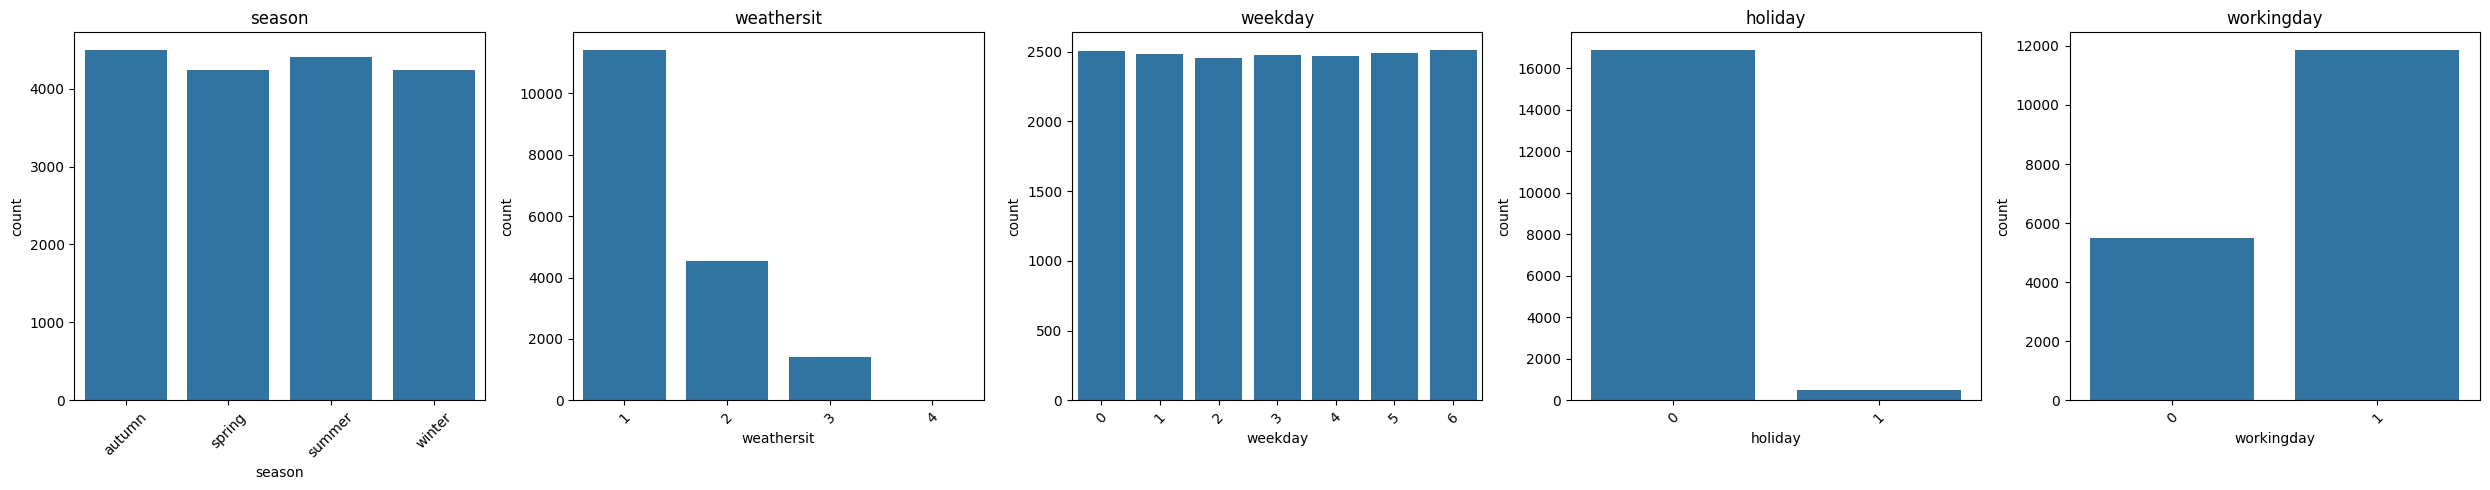

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv("motorbike_ambulance_calls.csv")

print("Variable types in a dataset:")
print(data.dtypes)

categorical_columns = ['season', 'weathersit', 'weekday', 'holiday', 'workingday']  
data_categorical = data[categorical_columns].astype('category')

if not data_categorical.empty:
    fig, ax = plt.subplots(1, len(data_categorical.columns), figsize=(5 * len(data_categorical.columns), 5))
    
    if len(data_categorical.columns) == 1:
        ax = [ax]

    for variable, subplot in zip(data_categorical.columns, ax):
        sns.countplot(x=data_categorical[variable], ax=subplot)
        subplot.set_title(variable)
        subplot.set_xticklabels(subplot.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()


**Висновки з 5-7 завдання (детальні)**



1. Categorical variables (season, weathersit, weekday, holiday, workingday) were extracted into a separate dataset for further analysis and preprocessing.
2. The season variable was mapped to numerical values (winter 1, spring 2, summer 3, fall 4)
3. Count plots were generated to analyze the distribution of categorical variables, revealing balanced seasonal data and an uneven distribution in weather conditions.



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [ ]:
import pandas as pd
data = pd.read_csv("motorbike_ambulance_calls.csv")
data_numerical = data.select_dtypes(include=['int64', 'float64'])
print(data_numerical.head())

   index  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0      1   0     1   0        0        6           0           1  0.24   
1      2   0     1   1        0        6           0           1  0.22   
2      3   0     1   2        0        6           0           1  0.22   
3      4   0     1   3        0        6           0           1  0.24   
4      5   0     1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  cnt  
0  0.2879  0.81        0.0   16  
1  0.2727  0.80        0.0   40  
2  0.2727  0.80        0.0   32  
3  0.2879  0.75        0.0   13  
4  0.2879  0.75        0.0    1  


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

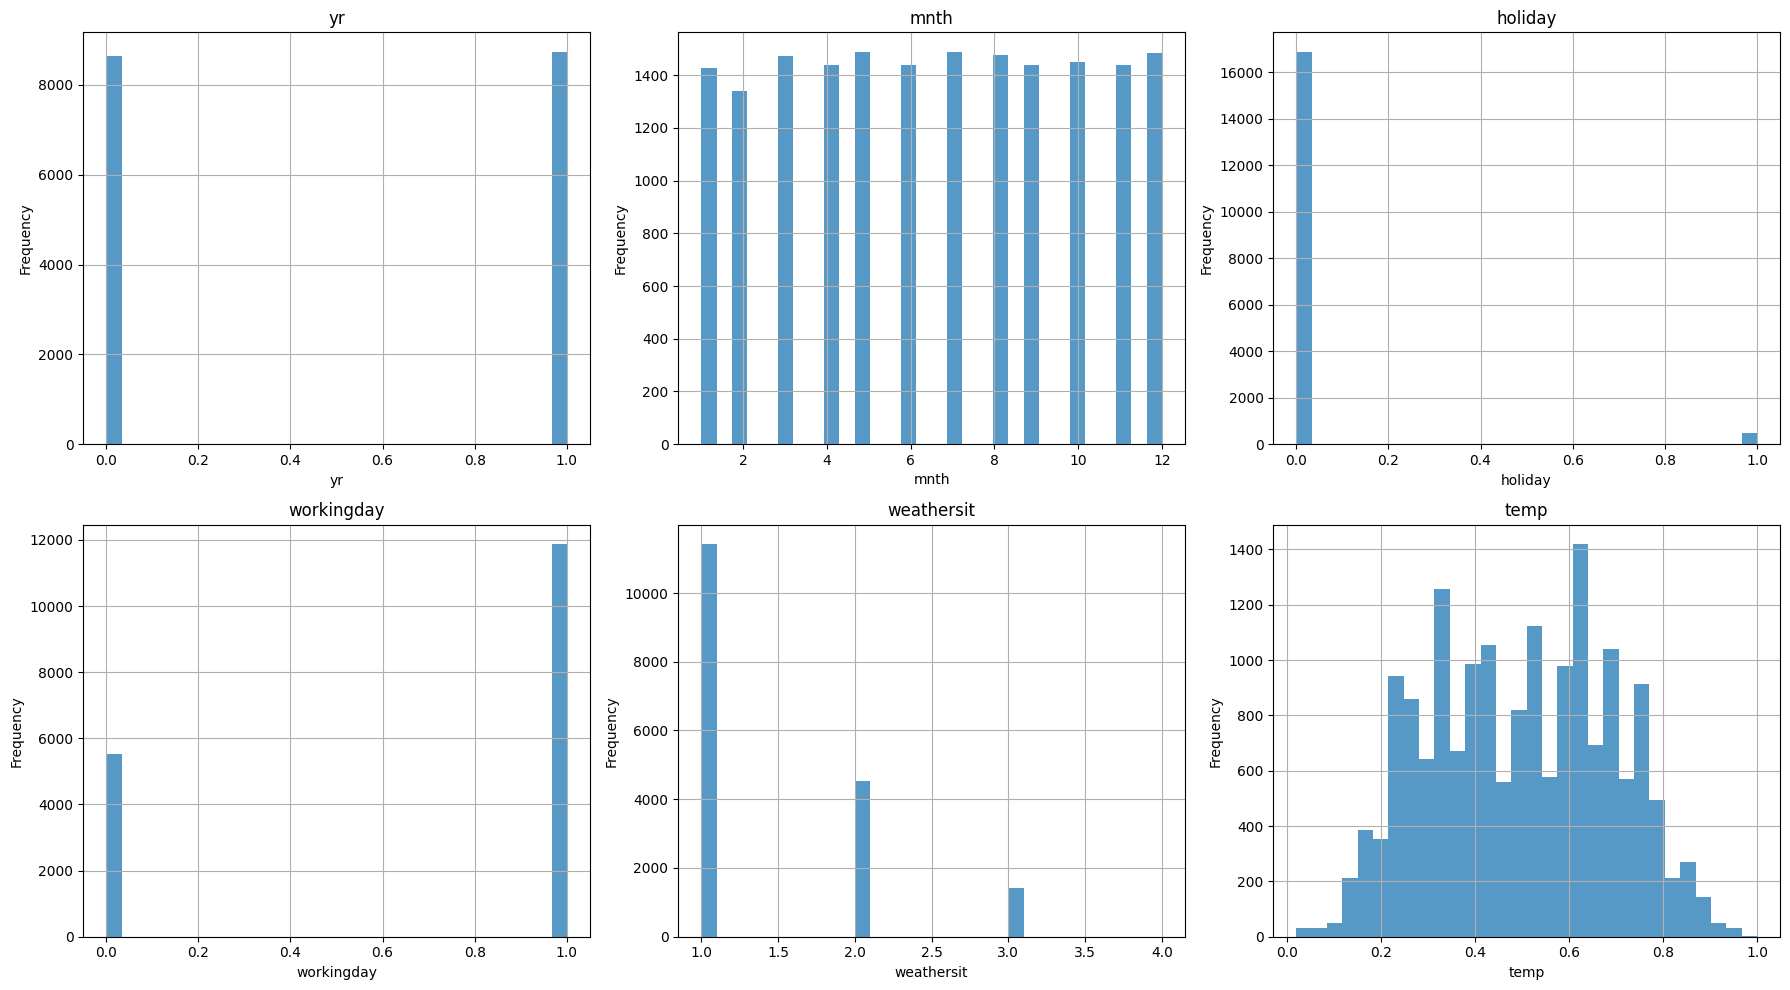

In [ ]:
import matplotlib.pyplot as plt

selected_columns = ['yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp']
data_selected = data_numerical[selected_columns]
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
ax = ax.flatten()
for i, col in enumerate(selected_columns):
    data_selected[col].hist(bins=30, ax=ax[i], alpha=0.75)
    ax[i].set_title(col)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

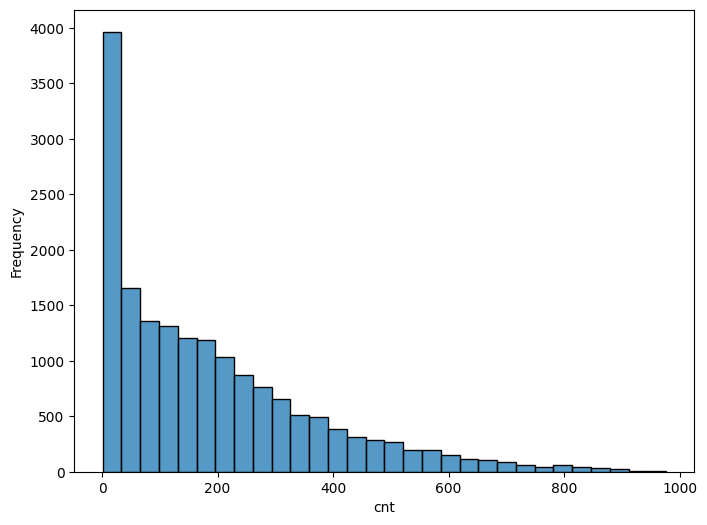

Skewness of cnt: 1.2774


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('motorbike_ambulance_calls.csv')

plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='cnt', bins=30) 
plt.xlabel("cnt")
plt.ylabel("Frequency")
plt.show()

skewness_value = data['cnt'].skew()
print(f"Skewness of cnt: {skewness_value:.4f}")


**Висновки з 8-10 завдання (детальні)**



1. All numerical (int64, float64) variables were extracted into a separate dataset.
2. Histograms revealed that yr, holiday, and workingday have discrete distributions, while temp shows a more continuous variation, indicating potential need for normalization.
3. The histogram indicates a right-skewed distribution skewness = 1.277, suggesting the possible need for logarithmic transformation to stabilize the data.



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

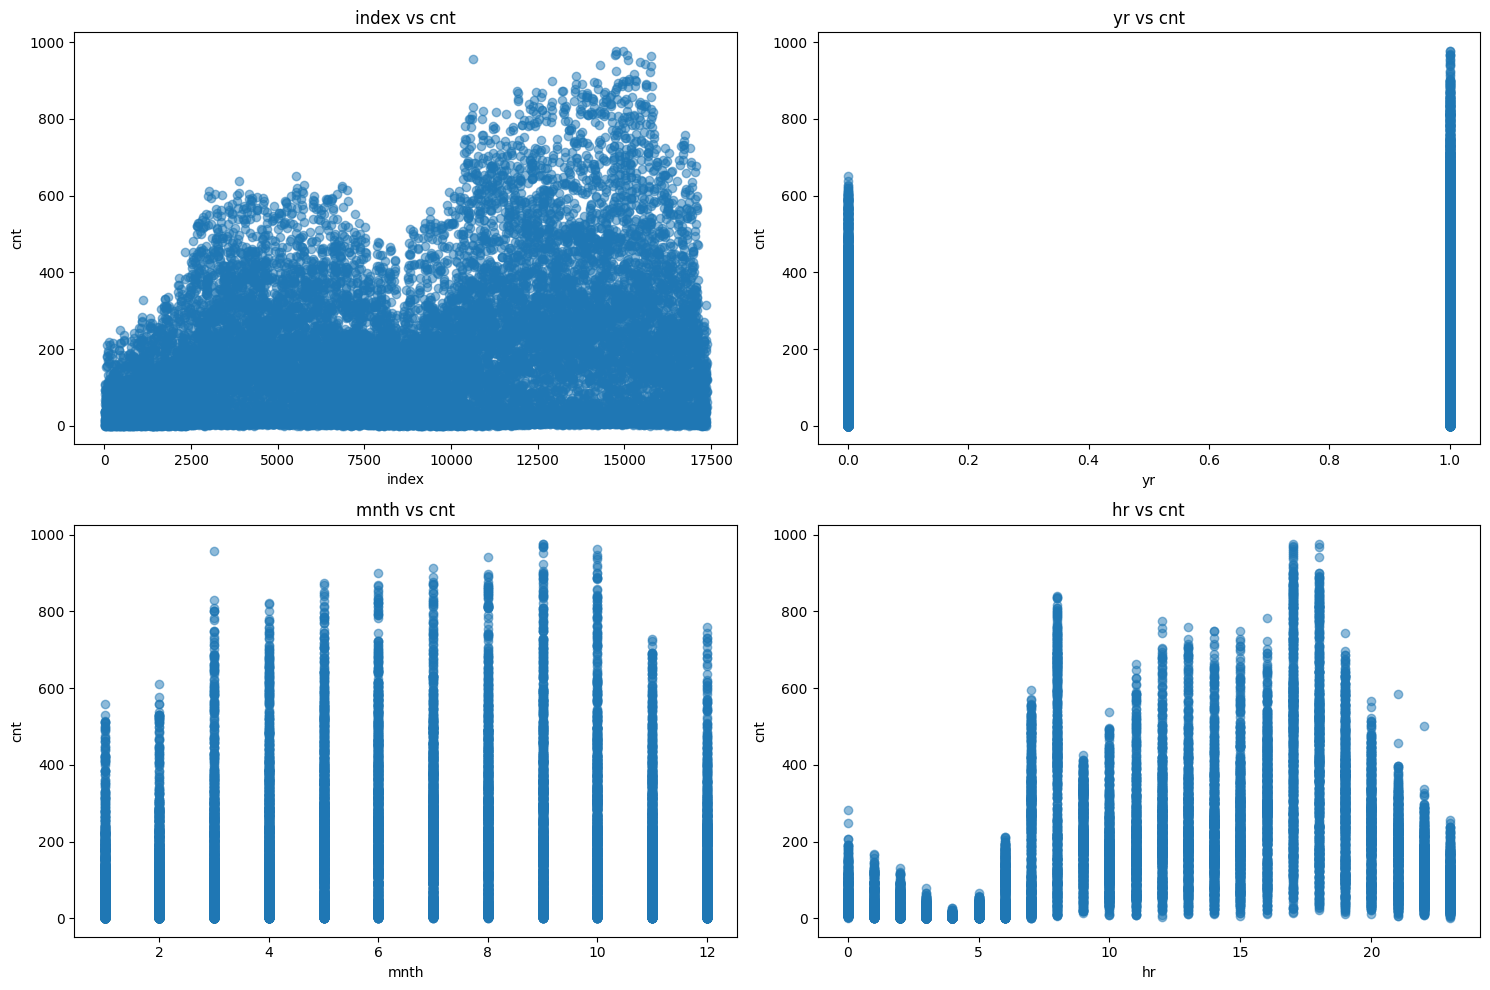

In [ ]:
import matplotlib.pyplot as plt

features = data_numerical.drop('cnt', axis=1).columns 
fig, axes = plt.subplots(2, 2, figsize=(15, 10)) 
axes = axes.flatten()

for var, ax in zip(features, axes):
    ax.scatter(data_numerical[var], data_numerical['cnt'], alpha=0.5)
    ax.set_title(f"{var} vs cnt")
    ax.set_xlabel(var)
    ax.set_ylabel("cnt")

plt.tight_layout()
plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

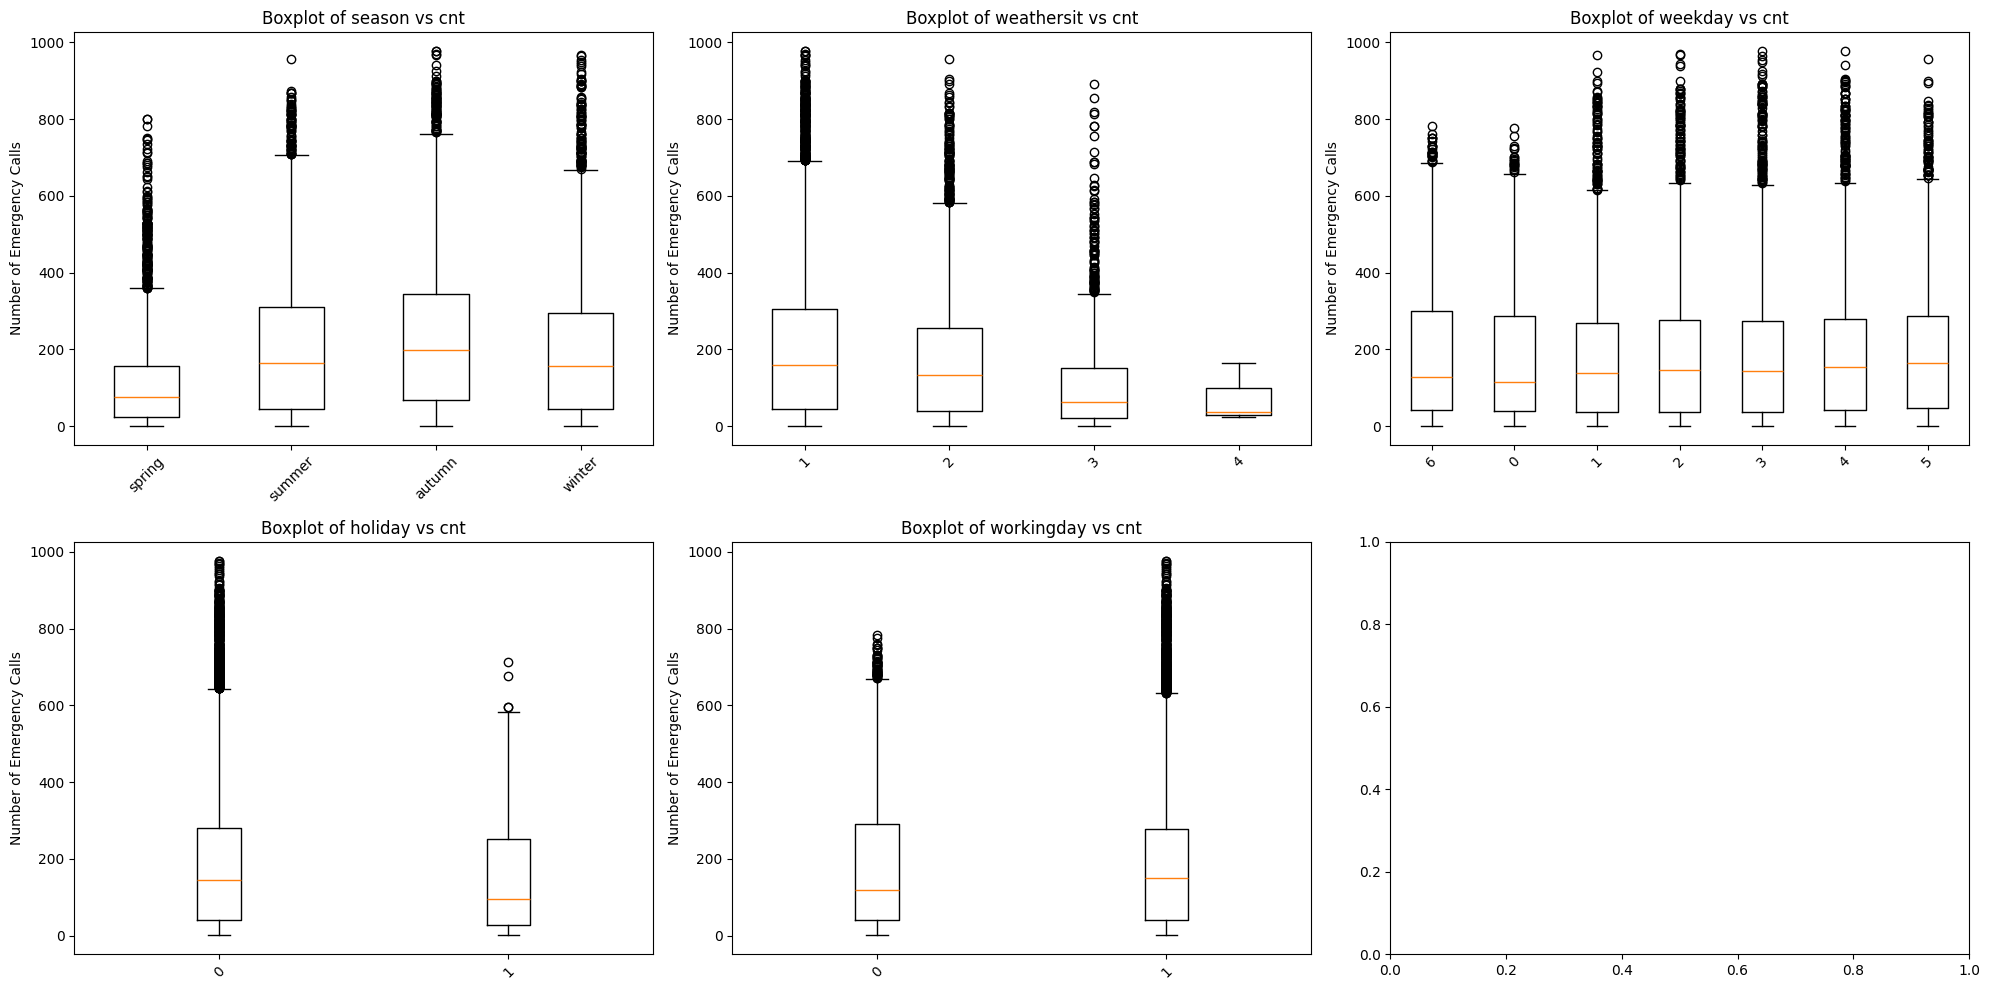

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

category_columns = ['season', 'weathersit', 'weekday', 'holiday', 'workingday']
for var, subplot in zip(category_columns, ax.flatten()):
    subplot.boxplot([data_numerical['cnt'][data_categorical[var] == category] for category in data_categorical[var].unique()])
    subplot.set_title(f'Boxplot of {var} vs cnt')
    subplot.set_ylabel('Number of Emergency Calls')
    subplot.set_xticklabels(data_categorical[var].unique(), rotation=45)

plt.tight_layout()
plt.show()


**Висновки з 11-12 завдання (детальні)**



1. The number of emergency calls is strongly influenced by hr (peak hours in the morning and evening), mnth (seasonal variations), and yr (trend over years), while index suggests an increasing trend in call volume over time.
2. The distribution of emergency calls (cnt) varies across season, weathersit, weekday, holiday, and workingday, with holidays showing slightly lower call volumes and significant outliers.
3. ...



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

C:\Users\asus\AppData\Local\Temp\ipykernel_19520\1674367083.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'], dayfirst=True, errors='coerce')


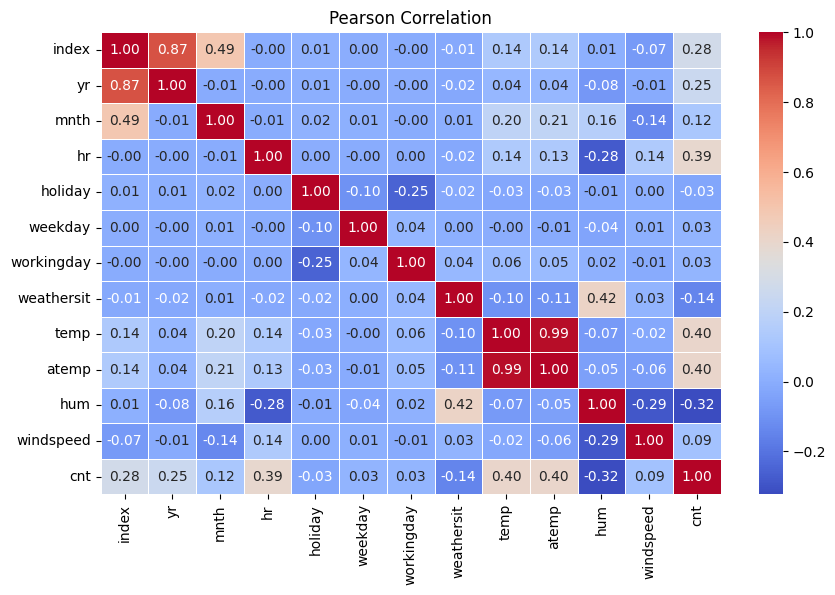

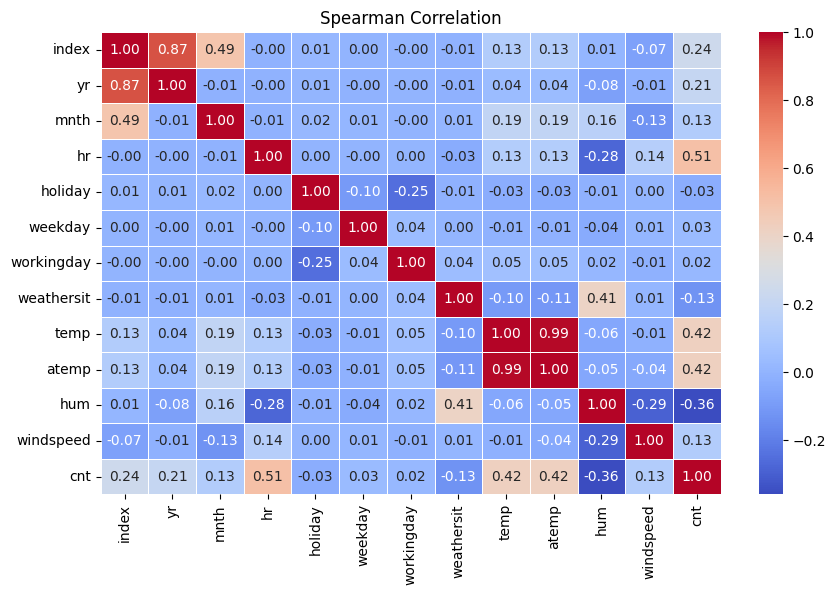

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("motorbike_ambulance_calls.csv")  

if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], dayfirst=True, errors='coerce')

numeric_data = data.select_dtypes(include=['number'])

if numeric_data.empty:
    print("Empty")
else:
    pearson_corr = numeric_data.corr(method='pearson')

    plt.figure(figsize=(10, 6))
    sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Pearson Correlation")
    plt.show()

    spearman_corr = numeric_data.corr(method='spearman')

    plt.figure(figsize=(10, 6))
    sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Spearman Correlation")
    plt.show()


In [ ]:
#Pearson shows a strong temp-atemp correlation (0.99), while Spearman highlights a stronger cnt-hr relationship (0.51), suggesting time impacts emergency calls and atemp may be redundant.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv("motorbike_ambulance_calls.csv")

print("Текстові стовпці:")
print(data.select_dtypes(include=['object']).columns)

if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')  

print("Пропущені значення:")
print(data.isnull().sum())

numerical_columns = data.select_dtypes(include=['number']).columns  
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())  

print("Пропущені значення після заповнення:")
print(data.isnull().sum())

def get_dummies(df: pd.DataFrame):
  
    features = pd.concat([df, pd.get_dummies(df['season'], prefix='season')], axis=1)

    features = features.drop(['season', 'mnth', 'weekday', 'weathersit', 'date'], axis=1)  
    return features

features = get_dummies(data)

train, test = train_test_split(features, test_size=0.3, random_state=42)

train, val = train_test_split(train, test_size=0.3, random_state=42)

X_train = train.drop('cnt', axis=1)  
y_train = train['cnt']  
X_test = test.drop('cnt', axis=1)
y_test = test['cnt']
X_val = val.drop('cnt', axis=1)
y_val = val['cnt']

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Текстові стовпці:
Index(['date', 'season'], dtype='object')
Пропущені значення:
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64
Пропущені значення після заповнення:
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64
Mean Squared Error: 19111.787466291753


C:\Users\asus\AppData\Local\Temp\ipykernel_25516\4239132619.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'], errors='coerce')


In [ ]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv("motorbike_ambulance_calls.csv")

data['night_hours'] = data['hr'].apply(lambda x: 1 if x >= 22 or x < 6 else 0)
print(data[['hr', 'night_hours']].head())

def get_dummies(df: pd.DataFrame):
    features = pd.concat([df, pd.get_dummies(df['season'], prefix='season')], axis=1)
    features = features.drop(['season', 'mnth', 'weekday', 'weathersit', 'date'], axis=1)  
    return features

features = get_dummies(data)

train, test = train_test_split(features, test_size=0.3, random_state=42)

train, val = train_test_split(train, test_size=0.3, random_state=42)

X_train = train.drop('cnt', axis=1)  
y_train = train['cnt']  
X_test = test.drop('cnt', axis=1)
y_test = test['cnt']
X_val = val.drop('cnt', axis=1)
y_val = val['cnt']

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


   hr  night_hours
0   0            1
1   1            1
2   2            1
3   3            1
4   4            1
Mean Squared Error: 14915.005915181779


**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [ ]:
features_lr = features.drop(['spring', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1)

In [ ]:

features = get_dummies(data)

print(features.columns)

features_lr = features.drop(['mnth_4', 'weekday_0', 'weathersit_1', 'hr_0', 'atemp'], axis=1, errors='ignore')  

def get_train_data(df: pd.DataFrame, target: str, test_size: float):
    X = df.drop(target, axis=1)  
    y = df[target]  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

def train_linear_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model = train_linear_model(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('MSE train: {:.3f}, test: {:.3f}'.format(
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

print('R^2 train: {:.3f}, test: {:.3f}'.format(
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))


Index(['index', 'yr', 'hr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'night_hours', 'season_autumn', 'season_spring',
       'season_summer', 'season_winter'],
      dtype='object')
MSE train: 15643.639, test: 14941.279
R^2 train: 0.532, test: 0.527


In [ ]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [11]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [ ]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 15643.639, test: 14941.279
R^2 train: 0.532, test: 0.527


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

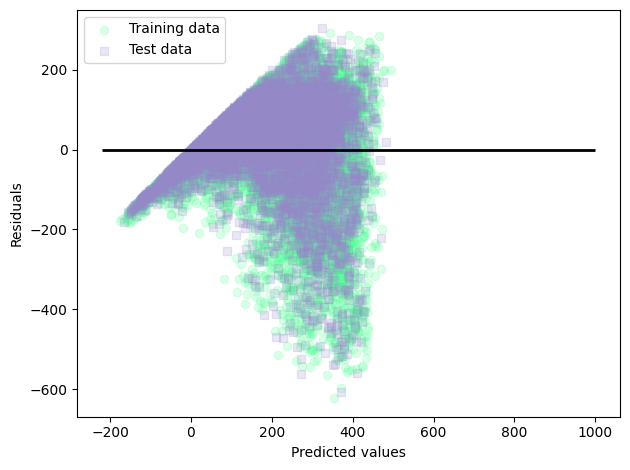

In [21]:
import matplotlib.pyplot as pl

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1.  The linear regression model works well with the data because it has an R² value close to 0.7 for both training and test data.
2.  The model does not suffer from overfitting because the MSE values ​​on the test and training data are similar.  
3. 

